# Pre-Model


##**Variables Details (1 ~ 4)**

Education

    'Below College'
    'College'
    'Bachelor'
    'Master'
    'Doctor'

EnvironmentSatisfaction

    'Low'
    'Medium'
    'High'
    'Very High'

JobInvolvement

    'Low'
    'Medium'
    'High'
    'Very High'

JobSatisfaction

    'Low'
    'Medium'
    'High'
    'Very High'

PerformanceRating

    'Low'
    'Good'
    'Excellent'
    'Outstanding'

RelationshipSatisfaction

    'Low'
    'Medium'
    'High'
    'Very High'

WorkLifeBalance

    'Bad'
    'Good'
    'Better'
    'Best'


In [ ]:
# import required packages
%matplotlib inline
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import math
from sklearn.metrics import *
!pip install -U dmba;
from dmba import regressionSummary
from sklearn.neural_network import MLPRegressor

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 68.7 MB/s eta 0:00:00
Colab environment detected.


In [ ]:
# connect to Google Drive and load the data
from google.colab import drive
drive.mount('/content/drive')
IBM = pd.read_csv('/content/drive/My Drive/Colab Data/IBMtrain.csv')
IBM.info()

Mounted at /content/drive
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1058 entries, 0 to 1057
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1058 non-null   int64 
 1   Attrition                 1058 non-null   int64 
 2   BusinessTravel            1058 non-null   object
 3   DailyRate                 1058 non-null   int64 
 4   Department                1058 non-null   object
 5   DistanceFromHome          1058 non-null   int64 
 6   Education                 1058 non-null   int64 
 7   EducationField            1058 non-null   object
 8   EmployeeCount             1058 non-null   int64 
 9   EmployeeNumber            1058 non-null   int64 
 10  EnvironmentSatisfaction   1058 non-null   int64 
 11  Gender                    1058 non-null   object
 12  HourlyRate                1058 non-null   int64 
 13  JobInvolvement            1058 non-null   int64 
 14

## Dataset Overview

In [ ]:
# shape of dataframe
IBM.shape

(1058, 35)

In [ ]:
IBM.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
IBM.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

## Naive Rule

In [ ]:
# Calculate the overall attrition rate
total_attritions = IBM['Attrition'].sum()
total_employees = IBM['Attrition'].count()

overall_attrition_rate = total_attritions / total_employees
print("The overall_attrition_rate is", overall_attrition_rate)

retention_rate = 1 - overall_attrition_rate
print("The overall retention rate is", retention_rate)

The overall_attrition_rate is 0.16918714555765596
The overall retention rate is 0.8308128544423441


## Initial Visualizations

In [ ]:
# Find the department with the highest attrition rate
unique_departments = IBM['Department'].unique()
unique_education = IBM['EducationField'].unique()

# Group by 'Department' and calculate counts
department_group = IBM.groupby('Department')['Attrition'].agg(['count', 'sum'])

# Calculate attrition rate as the ratio of sum (number of attritions) to count (total employees)
department_group['attrition_rate'] = department_group['sum'] / department_group['count']

# Find the department with the highest attrition rate
highest_attrition_department = department_group['attrition_rate'].idxmax()
highest_attrition_rate = department_group['attrition_rate'].max()
highest_attrition_department, highest_attrition_rate

('Sales', 0.20689655172413793)

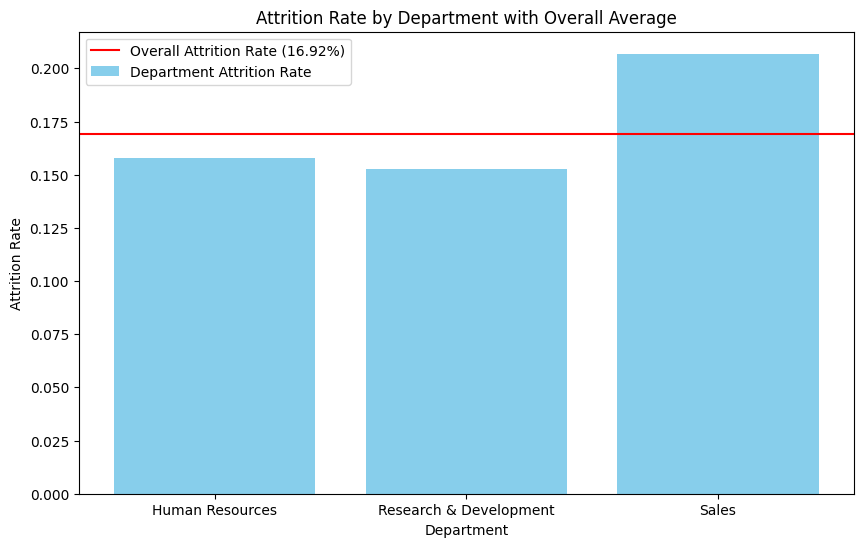

In [ ]:
# Attrition Rate by Department with Overall Average
# Extracting department names and their corresponding attrition rates
departments = department_group.index
attrition_rates = department_group['attrition_rate']

# Plotting the attrition rates of each department
plt.figure(figsize=(10, 6))
plt.bar(departments, attrition_rates, color='skyblue', label='Department Attrition Rate')

# Adding a line for the overall attrition rate
plt.axhline(y=overall_attrition_rate, color='r', linestyle='-', label=f'Overall Attrition Rate ({overall_attrition_rate:.2%})')

# Adding labels and title
plt.xlabel('Department')
plt.ylabel('Attrition Rate')
plt.title('Attrition Rate by Department with Overall Average')
plt.xticks(rotation=0)
plt.legend()

# Show the plot
plt.show()

<ipython-input-10-e503f104d149>:14: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  heatmap_data = grouped_data_reset.pivot("Department", "EducationField", "Attrition_rate")


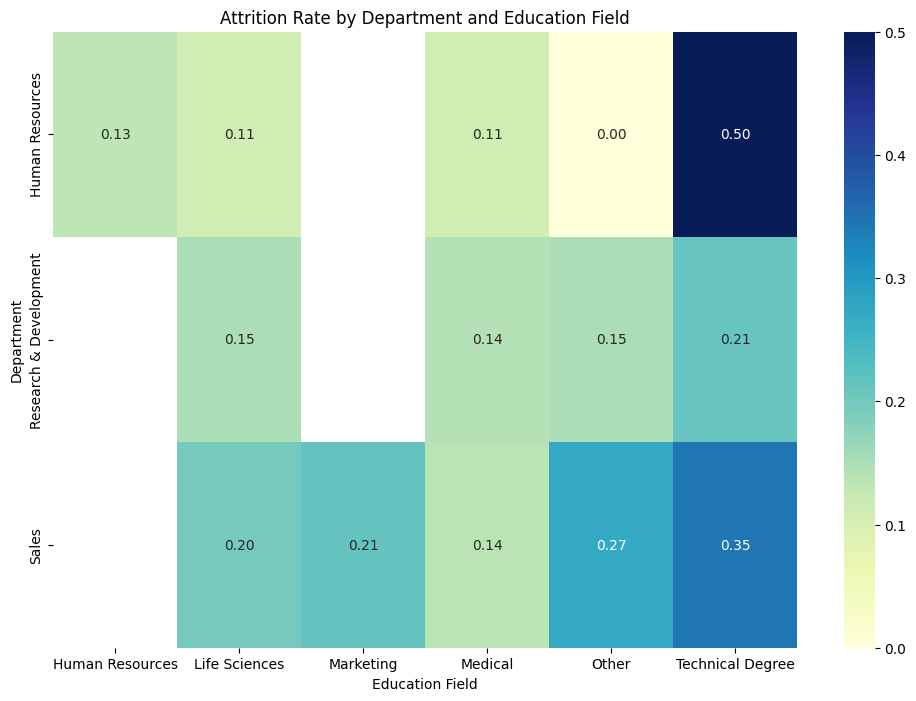

In [ ]:
# Attrition Rate by Department and Education Field
# Grouping the data by 'Department' and 'EducationField' and calculating the attrition rate
grouped_data = IBM.groupby(['Department', 'EducationField']).agg(
    Total_employees=('Attrition', 'count'),
    Attrition_count=('Attrition', 'sum')
)
grouped_data['Attrition_rate'] = grouped_data['Attrition_count'] / grouped_data['Total_employees']

# Resetting index for easier plotting
grouped_data_reset = grouped_data.reset_index()

# Creating a heatmap for visualization
plt.figure(figsize=(12, 8))
heatmap_data = grouped_data_reset.pivot("Department", "EducationField", "Attrition_rate")
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="YlGnBu")

plt.title('Attrition Rate by Department and Education Field')
plt.ylabel('Department')
plt.xlabel('Education Field')
plt.show()

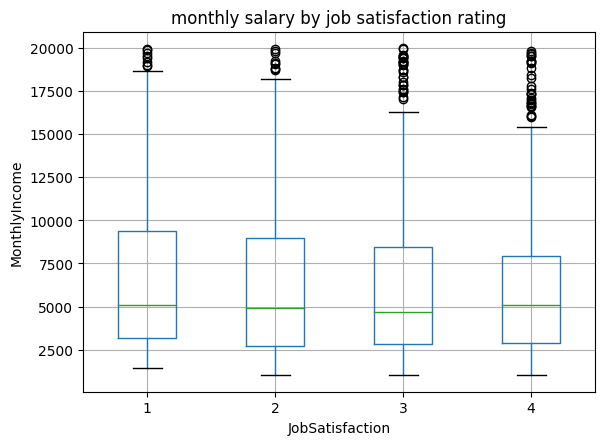

In [ ]:
#Monthly salary distribution by job satisfaction rating
ax = IBM.boxplot(column='MonthlyIncome', by='JobSatisfaction');

# make the figure more readable
ax.set_xlabel('JobSatisfaction');
ax.set_ylabel('MonthlyIncome');

plt.suptitle('');
plt.title( 'monthly salary by job satisfaction rating');

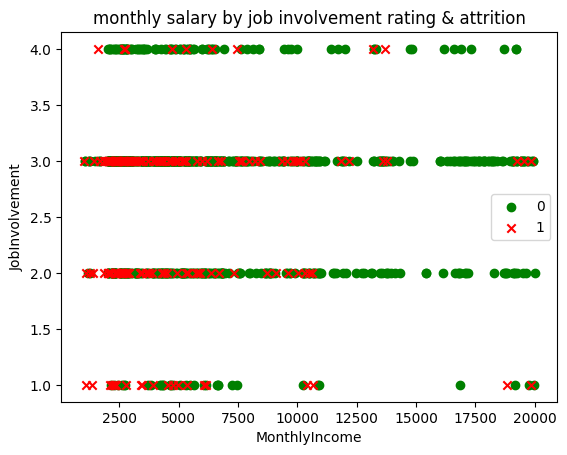

In [ ]:
#attrition vs. Job involvement score & Monthly Salary
fig, ax = plt.subplots()

subset0 = IBM.loc[IBM['Attrition']== 0]
ax.scatter(subset0.MonthlyIncome, subset0.JobInvolvement, marker='o', label='0', color='green')

subset1 = IBM.loc[IBM['Attrition']== 1]
ax.scatter(subset1.MonthlyIncome, subset1.JobInvolvement, marker='x', label='1', color='red')

plt.xlabel('MonthlyIncome')  # set x-axis label
plt.ylabel('JobInvolvement')  # set y-axis label

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels);
plt.title( 'monthly salary by job involvement rating & attrition');

Correlation between MonthlyIncome and Attrition: -0.16359969489187468
Income range with the highest relationship with Attrition: (1009.0, 3119.0]


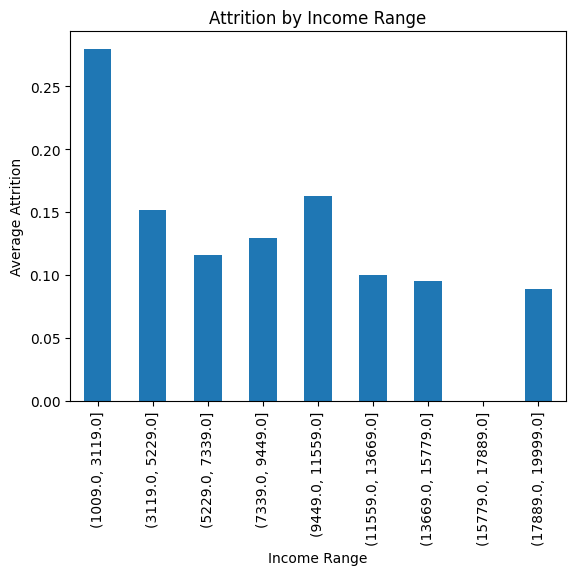

In [ ]:
#More about the correlation and distribution between monthly income and attrition

#the correlation between MonthlyIncome and Attrition
correlation = IBM['MonthlyIncome'].corr(IBM['Attrition'])
print("Correlation between MonthlyIncome and Attrition:", correlation)

# Create bins for MonthlyIncome
bins = np.linspace(IBM['MonthlyIncome'].min(), IBM['MonthlyIncome'].max(), num=10)

# Create a new column 'IncomeRange' to categorize MonthlyIncome into bins
IBM['IncomeRange'] = pd.cut(IBM['MonthlyIncome'], bins)

# Calculate the mean Attrition for each income range
attrition_by_income_range = IBM.groupby('IncomeRange')['Attrition'].mean()

# Find the income range with the highest average Attrition
max_attrition_range = attrition_by_income_range.idxmax()
print("Income range with the highest relationship with Attrition:", max_attrition_range)

attrition_by_income_range.plot(kind='bar', xlabel='Income Range', ylabel='Average Attrition', title='Attrition by Income Range')
plt.show()

## Data Pre-Processing & PCA

In [ ]:
#create dummy variables for categroical variables
dummies_BT = pd.get_dummies(IBM['BusinessTravel'],drop_first=False)
dummies_DP = pd.get_dummies(IBM['Department'],drop_first=False)
dummies_EF = pd.get_dummies(IBM['EducationField'],drop_first=False)
dummies_EF = dummies_EF.rename(columns={'Other': 'EF_Other'})
dummies_JR = pd.get_dummies(IBM['JobRole'],drop_first=False)
dummies_OT = pd.get_dummies(IBM['OverTime'],drop_first=False)
dummies_OT = dummies_OT.rename(columns={'Yes': 'OT_Yes', 'No': 'OT_No'})
dummies_MS = pd.get_dummies(IBM['MaritalStatus'],drop_first=False)
dummies_GD = pd.get_dummies(IBM['Gender'],drop_first=False)

IBM[dummies_BT.columns] = dummies_BT
IBM[dummies_DP.columns] = dummies_DP
IBM[dummies_EF.columns] = dummies_EF
IBM[dummies_JR.columns] = dummies_JR
IBM[dummies_OT.columns] = dummies_OT
IBM[dummies_MS.columns] = dummies_MS
IBM[dummies_GD.columns] = dummies_GD

# We are going to drop these coloumns because we are going to create dummy variables for them
Columns_Drop = ['BusinessTravel','Department','Gender','EducationField','JobRole','OverTime','Over18','OverTime','MaritalStatus','StandardHours','EmployeeCount','EmployeeNumber']
IBM_new = IBM.drop(columns=Columns_Drop)
IBM_new.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,Research Scientist,Sales Executive,Sales Representative,OT_No,OT_Yes,Divorced,Married,Single,Female,Male
0,41,1,1102,1,2,2,94,3,2,4,...,0,1,0,0,1,0,0,1,1,0
1,49,0,279,8,1,3,61,2,2,2,...,1,0,0,1,0,0,1,0,0,1
2,37,1,1373,2,2,4,92,2,1,3,...,0,0,0,0,1,0,0,1,0,1
3,33,0,1392,3,4,4,56,3,1,3,...,1,0,0,0,1,0,1,0,1,0
4,27,0,591,2,1,1,40,3,1,2,...,0,0,0,1,0,0,1,0,0,1


In [ ]:
# Drop outcome variable before performing PCA

# Step 1: Separate the outcome variable
Attrition = IBM_new["Attrition"]
IBM_Without_Attrition = IBM_new.drop(["Attrition","IncomeRange"], axis=1)
IBM_Without_Attrition.head(5)

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,Research Scientist,Sales Executive,Sales Representative,OT_No,OT_Yes,Divorced,Married,Single,Female,Male
0,41,1102,1,2,2,94,3,2,4,5993,...,0,1,0,0,1,0,0,1,1,0
1,49,279,8,1,3,61,2,2,2,5130,...,1,0,0,1,0,0,1,0,0,1
2,37,1373,2,2,4,92,2,1,3,2090,...,0,0,0,0,1,0,0,1,0,1
3,33,1392,3,4,4,56,3,1,3,2909,...,1,0,0,0,1,0,1,0,1,0
4,27,591,2,1,1,40,3,1,2,3468,...,0,0,0,1,0,0,1,0,0,1


In [ ]:
# correlation table for the quantitative variables
# the corr() method creates a new dataframe containing the correlation matrix
IBM_mat = IBM_Without_Attrition.corr()
IBM_mat

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,Research Scientist,Sales Executive,Sales Representative,OT_No,OT_Yes,Divorced,Married,Single,Female,Male
Age,1.000000,0.010507,-0.022753,0.180723,0.029247,0.005901,0.044010,0.506484,-0.020598,0.497392,...,-0.145827,-0.008242,-0.169179,-0.032743,0.032743,0.020696,0.075764,-0.098237,0.030312,-0.030312
DailyRate,0.010507,1.000000,0.027120,-0.039805,0.023005,0.038572,0.058871,0.003042,0.026694,0.008371,...,-0.005539,-0.037100,0.000616,-0.004170,0.004170,0.019890,0.053541,-0.074115,0.038867,-0.038867
DistanceFromHome,-0.022753,0.027120,1.000000,0.006185,-0.020197,0.048494,0.051250,-0.024838,0.003862,-0.042127,...,0.017172,0.019056,-0.009165,-0.038268,0.038268,0.008473,0.013293,-0.021552,0.000363,-0.000363
Education,0.180723,-0.039805,0.006185,1.000000,-0.002332,0.026237,0.034317,0.094922,0.001611,0.092533,...,-0.018509,0.042251,-0.092566,0.015874,-0.015874,0.018069,-0.044091,0.030326,0.037209,-0.037209
EnvironmentSatisfaction,0.029247,0.023005,-0.020197,-0.002332,1.000000,-0.064578,0.012431,0.016439,0.006159,0.001543,...,-0.007561,-0.011163,0.017733,-0.084285,0.084285,0.011402,-0.015129,0.005769,0.008524,-0.008524
HourlyRate,0.005901,0.038572,0.048494,0.026237,-0.064578,1.000000,0.047156,-0.021084,-0.073877,-0.014148,...,0.041495,-0.018816,0.001158,0.012056,-0.012056,-0.017808,0.023847,-0.009239,0.007658,-0.007658
JobInvolvement,0.044010,0.058871,0.051250,0.034317,0.012431,0.047156,1.000000,-0.008003,-0.029948,-0.007966,...,0.047537,0.019329,-0.033954,0.009853,-0.009853,0.030630,0.048460,-0.078339,0.011139,-0.011139
JobLevel,0.506484,0.003042,-0.024838,0.094922,0.016439,-0.021084,-0.008003,1.000000,-0.029369,0.953964,...,-0.406849,0.114520,-0.216620,0.014403,-0.014403,0.045645,0.045102,-0.088186,0.035909,-0.035909
JobSatisfaction,-0.020598,0.026694,0.003862,0.001611,0.006159,-0.073877,-0.029948,-0.029369,1.000000,-0.030743,...,0.014074,0.002297,0.001984,0.005859,-0.005859,-0.029333,-0.004799,0.031202,-0.057889,0.057889
MonthlyIncome,0.497392,0.008371,-0.042127,0.092533,0.001543,-0.014148,-0.007966,0.953964,-0.030743,1.000000,...,-0.361694,0.031988,-0.199998,0.001231,-0.001231,0.040029,0.057665,-0.096410,0.022813,-0.022813


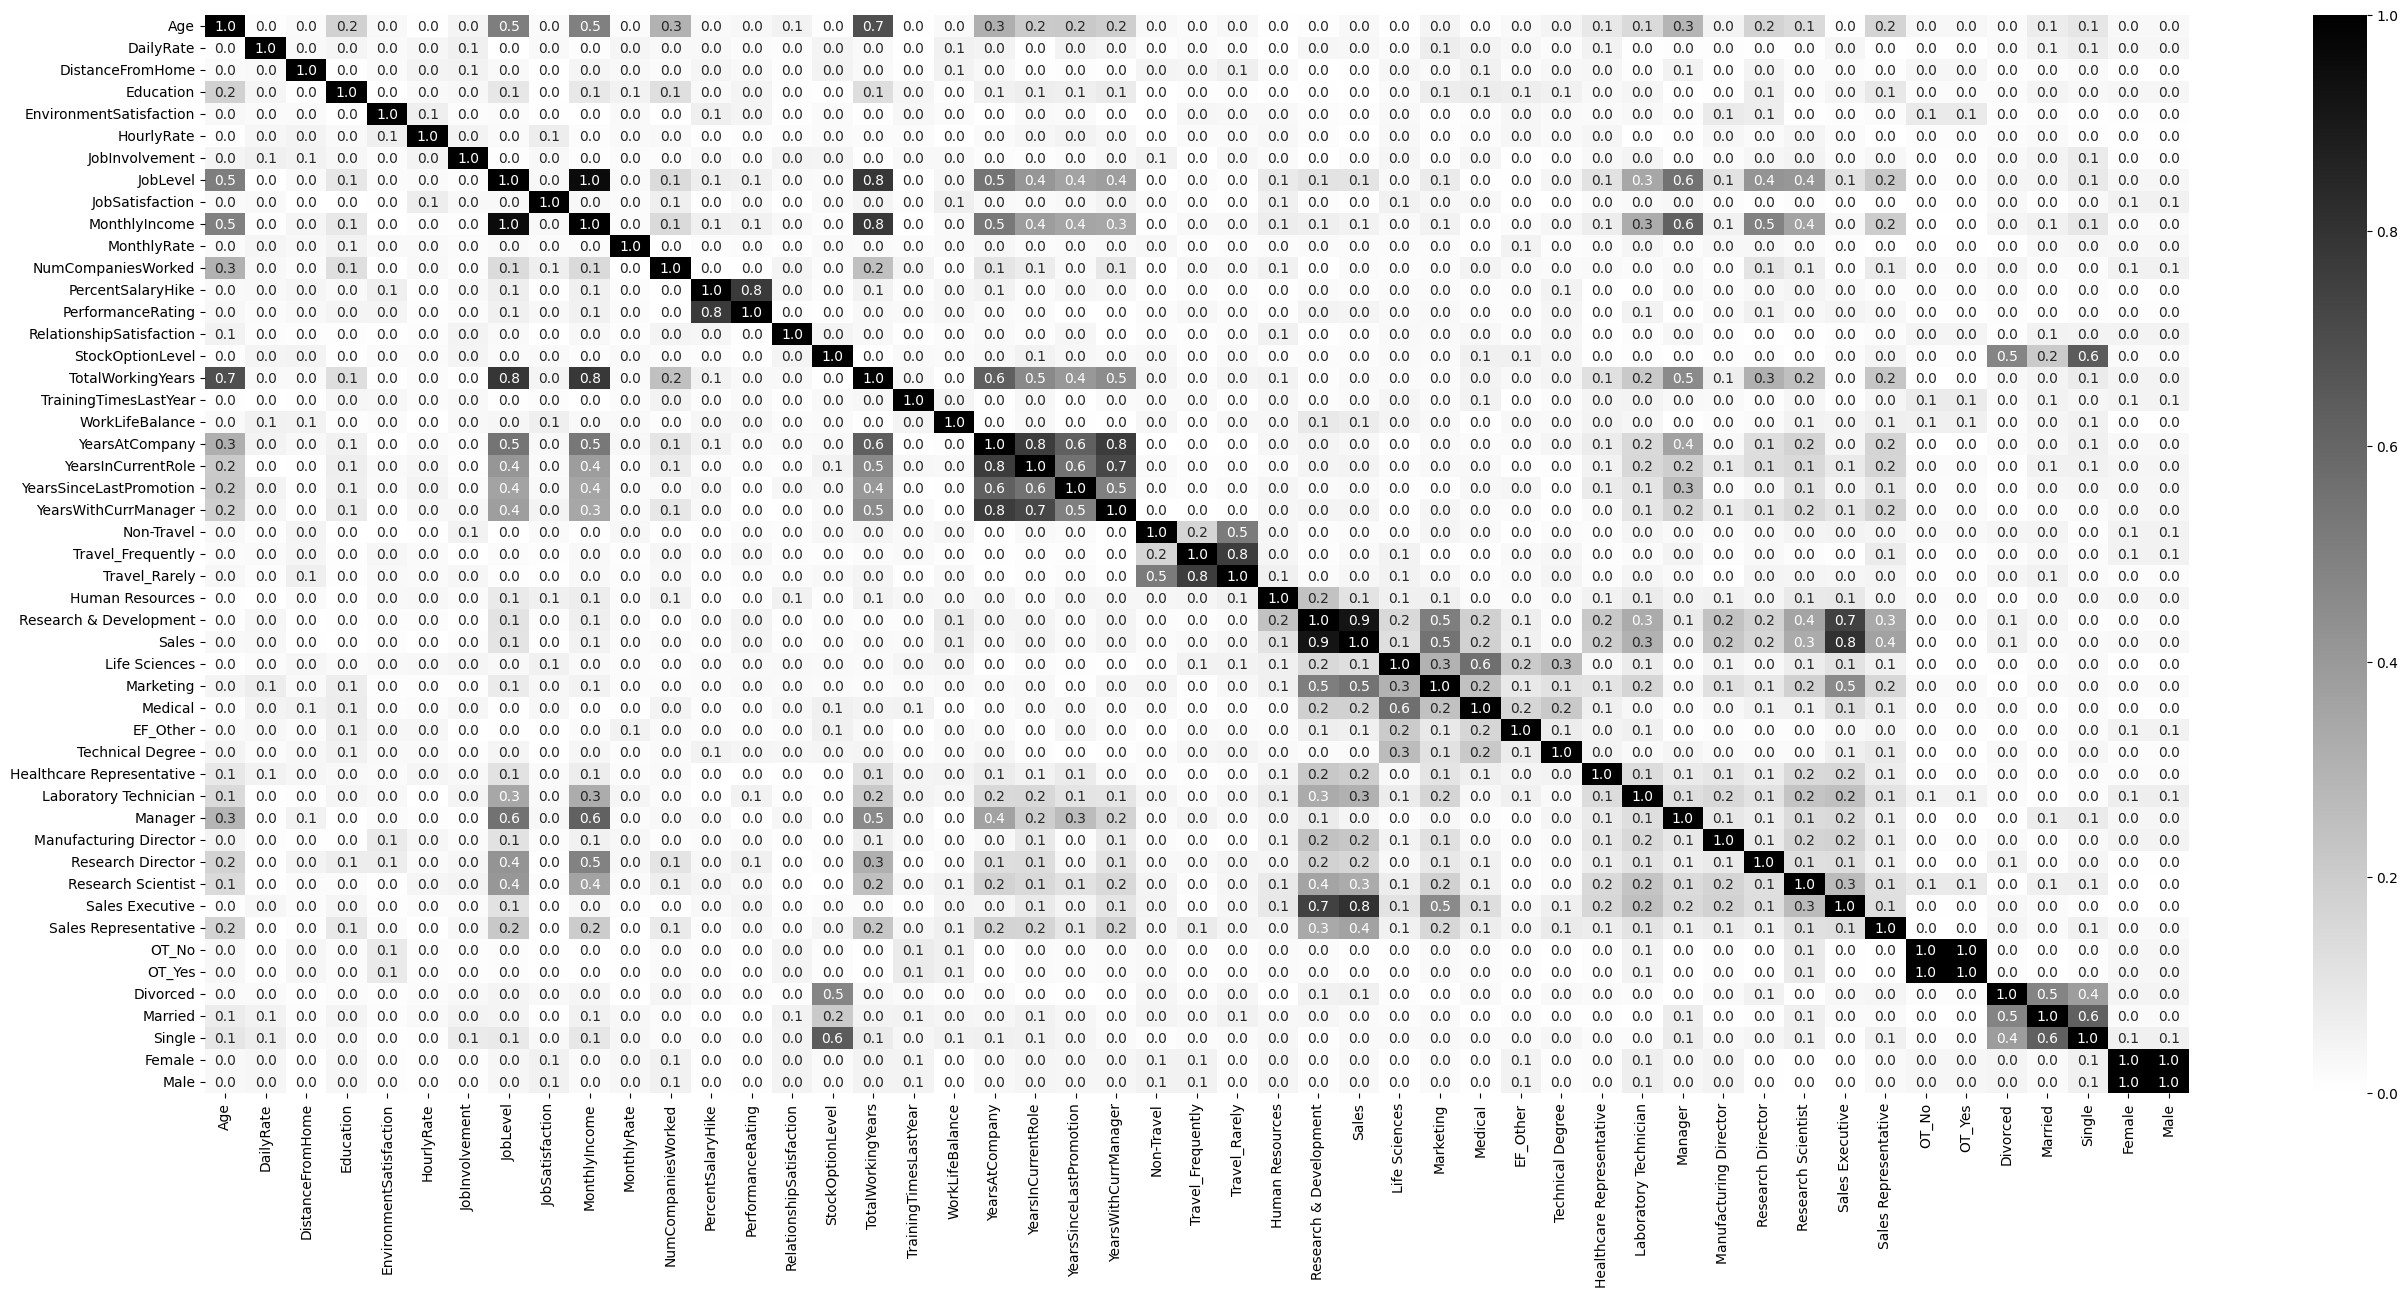

In [ ]:
#graph the correlation of each variables
plt.figure(figsize=(32,14))
sns.heatmap(np.absolute(IBM_mat), annot=True, fmt=".1f", vmin=0, vmax=1, cmap="gray_r"); #only thing changed is the axis and grey scale

In [ ]:
# Scaling Standardization (0 mean, unit variance) is done via the sklearn.preprocessing scale() function

pcs = PCA()
pcs.fit(preprocessing.scale(IBM_Without_Attrition))

# view the importance of principal components
pcsSummary_df = pd.DataFrame({
            'Proportion of variance': pcs.explained_variance_ratio_,
            'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)
            })
pcsSummary_df.round(3)

,Proportion of variance,Cumulative proportion
0,0.110,0.110
1,0.072,0.183
2,0.045,0.228
3,0.044,0.272
4,0.041,0.313
5,0.040,0.353
6,0.038,0.390
7,0.036,0.426
8,0.033,0.459
9,0.031,0.491


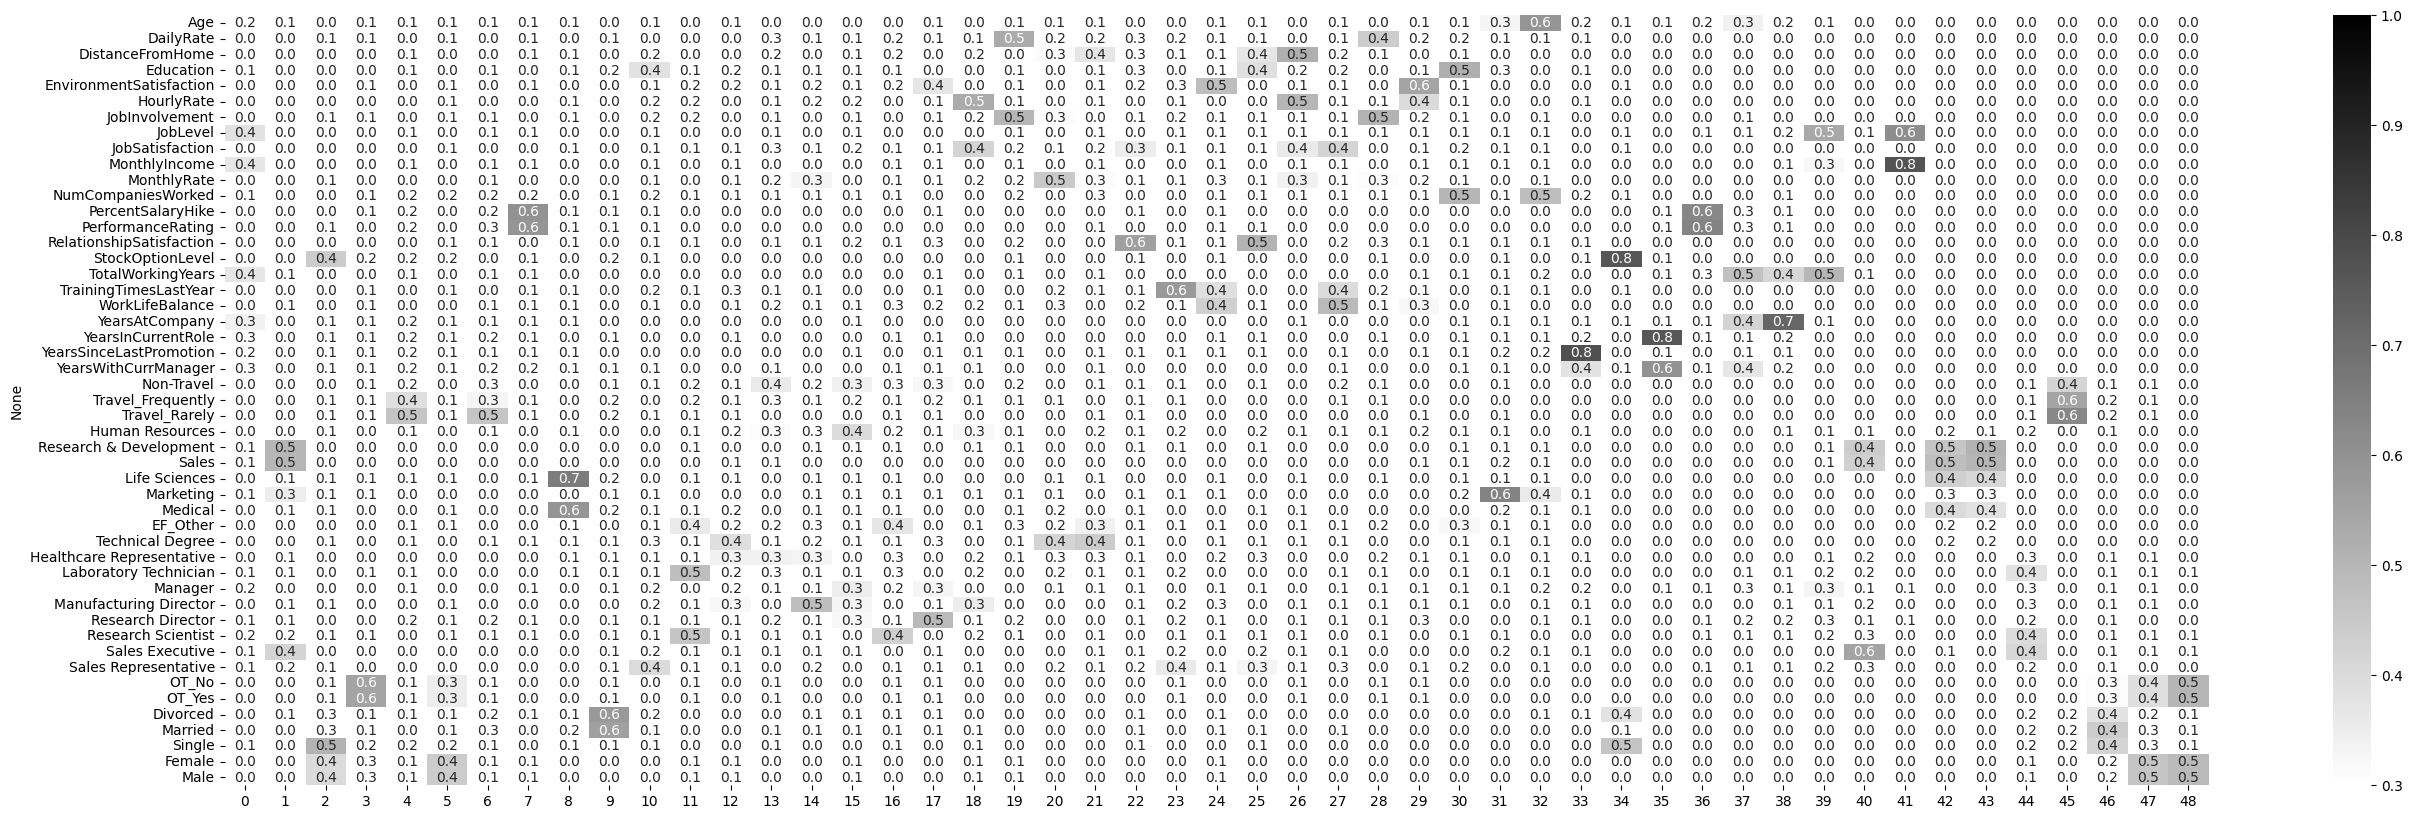

In [ ]:
# Initial Component matrix (correlations)
var = list(IBM_Without_Attrition.columns)

plt.figure(figsize=(32,10))
sns.heatmap(np.absolute(pd.DataFrame(pcs.components_.transpose(), index=[var]).round(2)), annot=True, fmt=".1f", vmin=0.3, vmax=1, cmap="gray_r"); #only thing changed is the axis and grey scale

Variable 1: Work Experience
Variable 2:

In [ ]:
#Eigenvalues are given by the PCA explained_variance_ method
eig=pcs.explained_variance_.round(2)
print(eig)

[5.41 3.55 2.22 2.14 2.01 1.96 1.86 1.77 1.62 1.53 1.36 1.28 1.25 1.23
 1.2  1.19 1.14 1.12 1.08 1.03 1.02 1.01 0.97 0.96 0.93 0.92 0.87 0.86
 0.84 0.81 0.79 0.68 0.56 0.49 0.34 0.27 0.23 0.21 0.14 0.1  0.06 0.03
 0.02 0.01 0.   0.   0.   0.   0.  ]


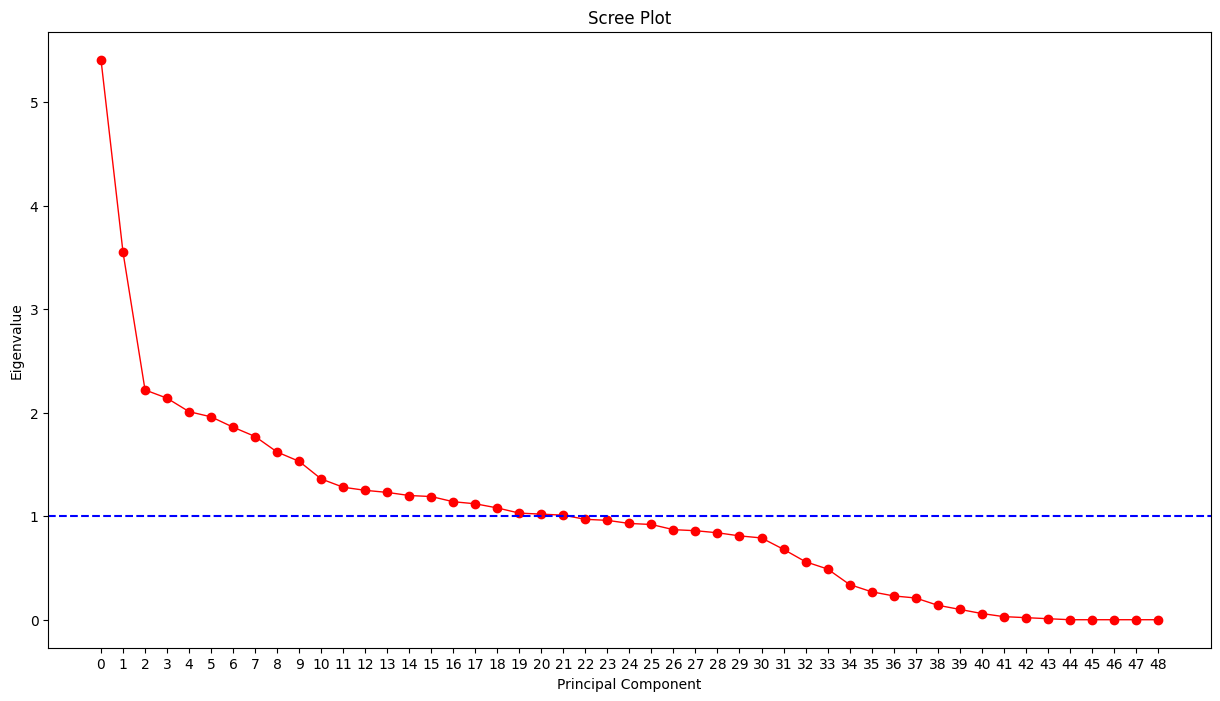

In [ ]:
# scree plot of eigenvalues
# define the x values, i.e., components
xvals = np.arange(IBM_Without_Attrition.shape[1]);
#figure size
plt.figure(figsize=(15,8))
#plot in red color
plt.plot(xvals, eig, 'ro-', linewidth=1)
#set ticks to every unit
plt.xticks(xvals)

#add labels...
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')

#add a horizontal line in blue for latent root criterion
plt.axhline(y=1, color='b', linestyle='--')

**Scree Test**: keep 10 variables - at the second inflection point

## Rerun PCA on 10 Components

In [ ]:
# Keeping the first 10 components based on scree test criterion
# fit() function runs the PCA and shows the % of var explained
# fit_transform() function runs the PCA and shows the actual PCA values (the components score)
pcs = PCA(n_components=10)
principalComponents = pcs.fit_transform(preprocessing.scale(IBM_Without_Attrition))

# make the output more readable by creating a new dataframe
principalDF = pd.DataFrame(
        data = principalComponents.round(2),
        columns = ['Career_Longevity','Business_Development_Units','Work-Life_Choices','OverTime','TravelSometimes','Gender','Family&Travel','Performance&Bonus', 'Medical&LifeScience', 'Divorce_or_married']
        )

# Naming F1 - F10
  # F1 = Career Longevity: Reflecting tenure, promotions, and time in roles.
  # F2 = Business_Development_Units: Indicating job position in sales, research and development departments.
  # F3 = Work-Life Choices: Representing overtime decisions and marital status.
  # F4 = OverTime: Highlighting if the employee is taking overtime or not.
  # F5 = TravelSometimes: Relating to the the variable if the employee traveled sometimes.
  # F6 = Gender: Relating to the work travel variable and gender
  # F7 = Family&Travel: Focusing on the travel and marital status.
  # F8 = Perfiemance&Bonus: Realating to PerformanceRating and PercentSalaryHike
  # F9 = Medical&LifeScience: Pointing to if the employee had education in Med school or Life science
  # F10 = Divorce_or_married: Focusing on whether the employee is divorced or married (besides single).
# confirm component scores are orthogonal (small correlations)
principalDF.corr().round(4)

,Career_Longevity,Business_Development_Units,Work-Life_Choices,OverTime,TravelSometimes,Gender,Family&Travel,Performance&Bonus,Medical&LifeScience,Divorce_or_married
Career_Longevity,1.0000,0.0001,0.0000,0.0000,0.0000,0.0000,-0.0000,0.0001,-0.0000,0.0000
Business_Development_Units,0.0001,1.0000,-0.0000,0.0000,-0.0001,0.0000,0.0000,-0.0000,0.0001,-0.0000
Work-Life_Choices,0.0000,-0.0000,1.0000,-0.0001,-0.0000,-0.0000,-0.0001,0.0001,0.0000,0.0001
OverTime,0.0000,0.0000,-0.0001,1.0000,0.0000,0.0000,-0.0000,0.0000,0.0001,-0.0001
TravelSometimes,0.0000,-0.0001,-0.0000,0.0000,1.0000,0.0001,0.0000,0.0000,-0.0002,0.0000
Gender,0.0000,0.0000,-0.0000,0.0000,0.0001,1.0000,-0.0000,-0.0000,-0.0001,0.0000
Family&Travel,-0.0000,0.0000,-0.0001,-0.0000,0.0000,-0.0000,1.0000,0.0001,0.0002,0.0000
Performance&Bonus,0.0001,-0.0000,0.0001,0.0000,0.0000,-0.0000,0.0001,1.0000,0.0001,0.0000
Medical&LifeScience,-0.0000,0.0001,0.0000,0.0001,-0.0002,-0.0001,0.0002,0.0001,1.0000,0.0000
Divorce_or_married,0.0000,-0.0000,0.0001,-0.0001,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000


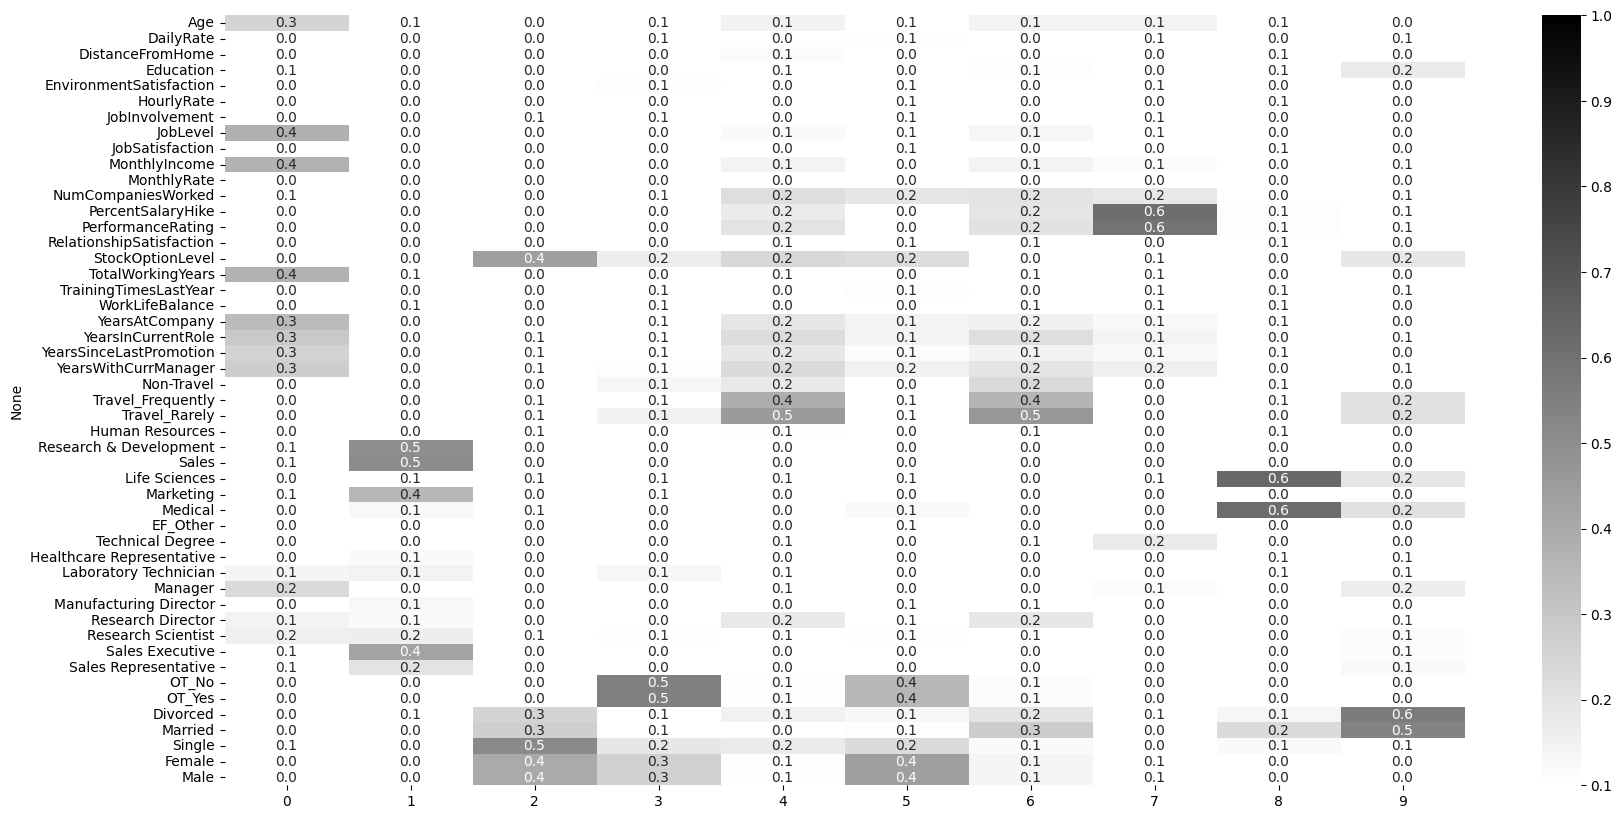

In [ ]:
#New Principle Component graph with 10 super variables
var = list(IBM_Without_Attrition.columns)

plt.figure(figsize=(20,10))
sns.heatmap(np.absolute(pd.DataFrame(pcs.components_.transpose(), index=[var]).round(4)), annot=True, fmt=".1f", vmin=0.1, vmax=1, cmap="gray_r"); #only thing changed is the axis and grey scale

In [ ]:
# merge component scores with the original dataframe (after missing values are dropped)
# we will use the concatenate, concat() function
IBM_Complete = pd.concat([IBM_Without_Attrition.dropna(subset=IBM_Without_Attrition.columns, how='any').reset_index(drop=True), principalDF], axis=1)
columns_to_keep = ['Career_Longevity','Business_Development_Units','Work-Life_Choices','OverTime','TravelSometimes','Gender','Family&Travel','Performance&Bonus', 'Medical&LifeScience', 'Divorce_or_married']
IBM_Complete = IBM_Complete[columns_to_keep]
IBM_Complete

,Career_Longevity,Business_Development_Units,Work-Life_Choices,OverTime,TravelSometimes,Gender,Family&Travel,Performance&Bonus,Medical&LifeScience,Divorce_or_married
0,-0.03,2.21,2.08,2.51,-1.05,0.54,0.21,0.31,-1.83,0.47
1,-0.14,-1.32,-0.27,-1.51,2.80,0.58,-0.31,2.47,-0.95,-0.70
2,-2.85,-1.03,0.45,1.02,-1.84,2.23,1.24,0.64,0.09,-0.70
3,-1.22,-0.98,1.63,2.32,2.16,0.32,0.81,-1.38,-1.80,-1.29
4,-2.02,-1.10,-1.83,-0.93,-1.47,-0.82,-0.33,-0.49,1.00,-1.53
...,...,...,...,...,...,...,...,...,...,...
1053,0.63,-1.69,-1.11,-0.90,1.16,1.02,-2.69,2.59,-1.28,0.24
1054,2.29,-1.85,-1.78,-0.40,-0.57,-0.55,0.73,-0.20,-0.56,2.05
1055,3.61,-1.89,-1.83,-0.96,0.99,-1.20,3.14,-0.55,1.70,0.77
1056,-2.13,2.74,-0.91,-1.32,0.48,-1.12,1.08,-0.82,-0.42,-2.14


In [ ]:
IBM_Complete["Attrition"] = Attrition
IBM_Complete.head()

,Career_Longevity,Business_Development_Units,Work-Life_Choices,OverTime,TravelSometimes,Gender,Family&Travel,Performance&Bonus,Medical&LifeScience,Divorce_or_married,Attrition
0,-0.03,2.21,2.08,2.51,-1.05,0.54,0.21,0.31,-1.83,0.47,1
1,-0.14,-1.32,-0.27,-1.51,2.80,0.58,-0.31,2.47,-0.95,-0.70,0
2,-2.85,-1.03,0.45,1.02,-1.84,2.23,1.24,0.64,0.09,-0.70,1
3,-1.22,-0.98,1.63,2.32,2.16,0.32,0.81,-1.38,-1.80,-1.29,0
4,-2.02,-1.10,-1.83,-0.93,-1.47,-0.82,-0.33,-0.49,1.00,-1.53,0


## Train-Test-Split

In [ ]:
# Split data

y = IBM_Complete["Attrition"]
X = IBM_Complete.drop("Attrition", axis=1)

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.4, random_state = 42, stratify = y)

# All-Models

##Decision Tree

In [ ]:
# Training a full decision tree model
dt_model = DecisionTreeClassifier(random_state=42, max_depth=6)
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)

#visualize the tree
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(dt_model, filled=True, feature_names=X_train.columns, class_names=['No Attrition', 'Attrition'], max_depth=6)
plt.title('Decision Tree Visualization (Top Levels)')
plt.show()

dt_predictions = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)

#confusion matrix for the tree
conf_matrix = confusion_matrix(y_test, dt_predictions)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Attrition', 'Attrition'], yticklabels=['No Attrition', 'Attrition'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for Dt')
plt.show()

print(dt_accuracy)

NameError: ignored

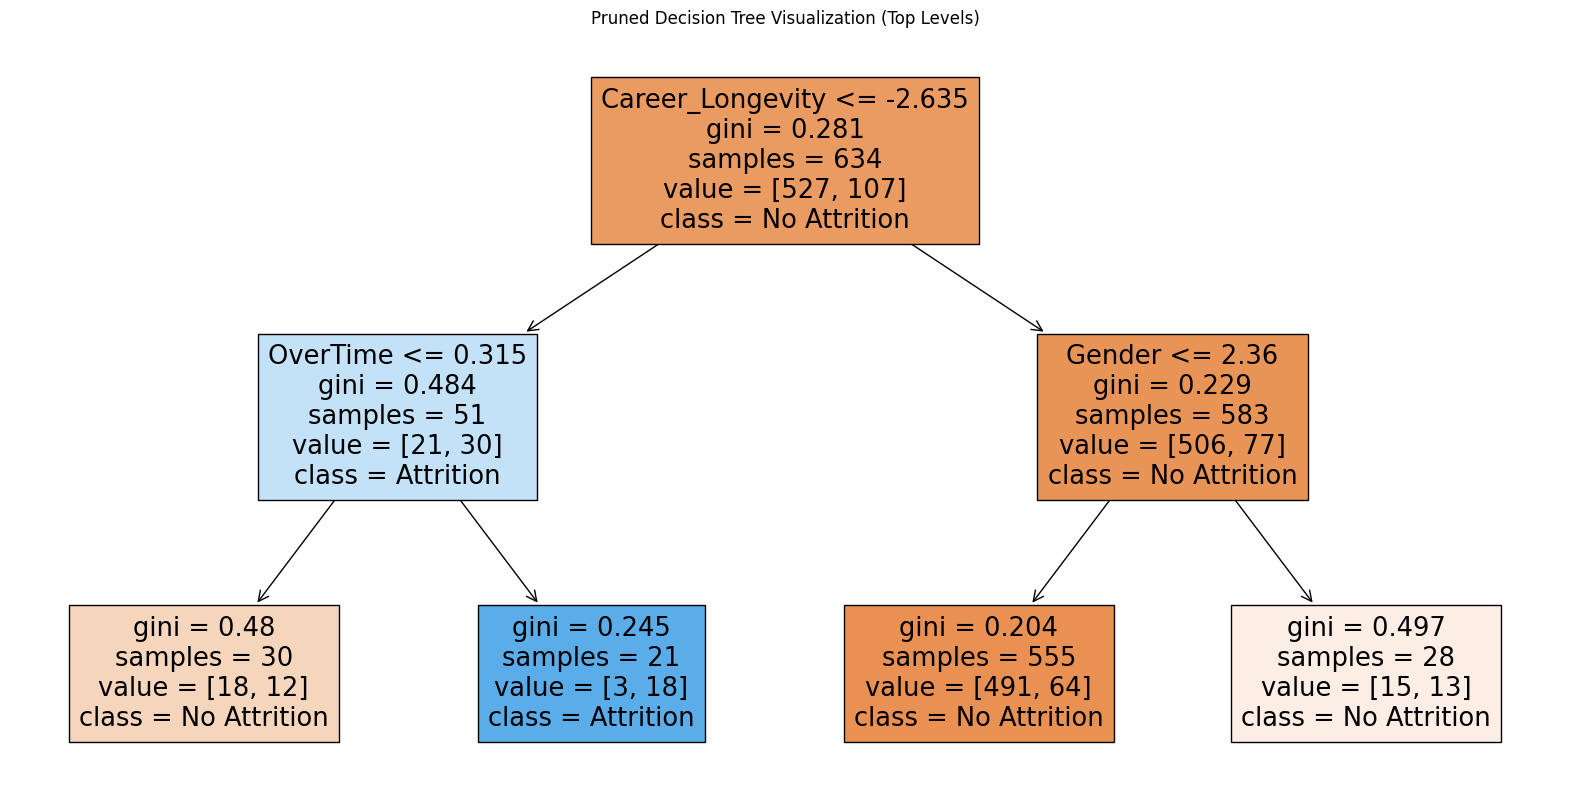

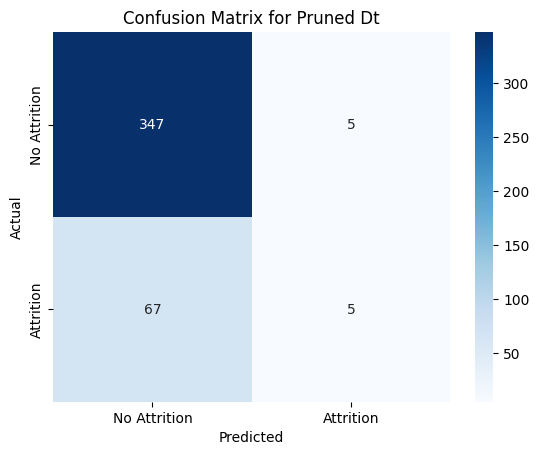

0.8301886792452831


In [ ]:
# Training a pruned decision tree model
dt_model = DecisionTreeClassifier(random_state=42, max_depth=2)
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)

#visualize the tree
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(dt_model, filled=True, feature_names=X_train.columns, class_names=['No Attrition', 'Attrition'], max_depth=2)
plt.title('Pruned Decision Tree Visualization (Top Levels)')
plt.show()

dt_predictions = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)

#confusion matrix for the tree
pruned_dt_conf_matrix = confusion_matrix(y_test, dt_predictions)
sns.heatmap(pruned_dt_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Attrition', 'Attrition'], yticklabels=['No Attrition', 'Attrition'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for Pruned Dt')
plt.show()

print(dt_accuracy)

## Random Forest

0.8278301886792453


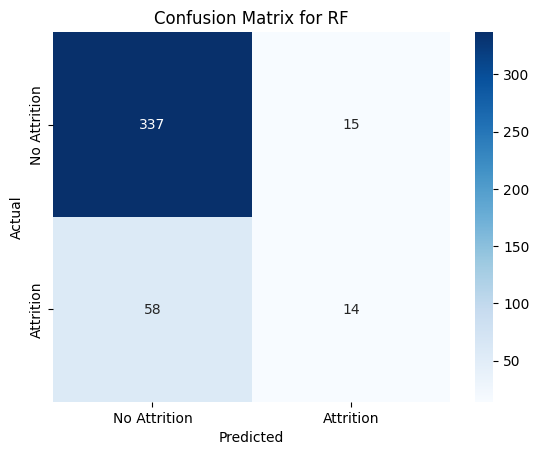

In [ ]:
# Training a Random forest model
rf = RandomForestClassifier(
    n_estimators=10000,
    random_state=42,
    criterion='gini',
    n_jobs = -1)
rf.fit(X_train, y_train)
rf_predictions = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)

print(accuracy_score(y_test, rf_predictions))

rf_conf_matrix = confusion_matrix(y_test, rf_predictions)
sns.heatmap(rf_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Attrition', 'Attrition'], yticklabels=['No Attrition', 'Attrition'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for RF')
plt.show()

## KNN

In [ ]:
# Training an initial k-NN model
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_predictions)

print(knn_accuracy)

from tqdm import tqdm
results = []
for k in tqdm(range(1, 51, 1)):
    knn = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)

    # create a dictionary to store the results
    results.append({
        'k': k,
        'accuracy': accuracy_score(y_test, knn.predict(X_test))
    })

# convert results to a pandas dataframe for better visualization
print('\n')
print("accuracy of knn with different n")
results_df = pd.DataFrame(results)
results_df



0.7971698113207547


100%|██████████| 50/50 [00:02<00:00, 19.00it/s]



accuracy of knn with different n


,k,accuracy
0,1,0.797170
1,2,0.837264
2,3,0.832547
3,4,0.837264
4,5,0.832547
5,6,0.851415
6,7,0.837264
7,8,0.841981
8,9,0.849057
9,10,0.844340


Max value = 0.8514150943396226 |  Best k = 6


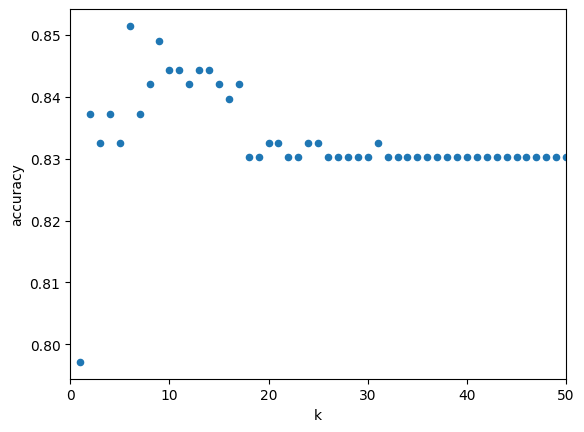

In [ ]:
# Find the max value and associated index
results_df.plot.scatter(x='k', y='accuracy', xlim=[0, 50]);
max_val = results_df['accuracy'].max()
max_val_idx = results_df['accuracy'].idxmax()

print("Max value =", max_val, '|', " Best k =", results_df['k'][max_val_idx])

knn accuracy: 0.8514150943396226


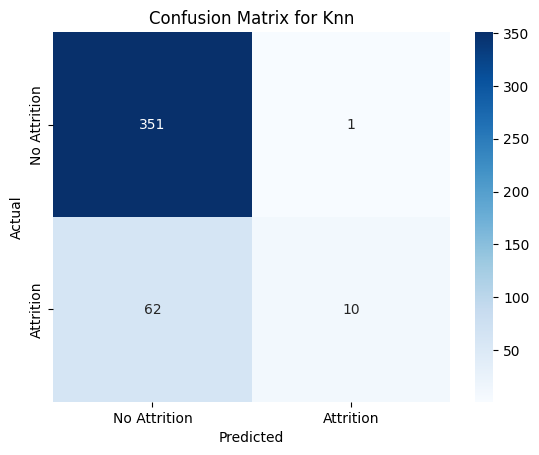

In [ ]:
#retrain the knn model with the max accuracy
knn_model = KNeighborsClassifier(n_neighbors=results_df['k'][max_val_idx])
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_predictions)

print("knn accuracy:",knn_accuracy)

knn_conf_matrix = confusion_matrix(y_test, knn_predictions)
sns.heatmap(knn_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Attrition', 'Attrition'], yticklabels=['No Attrition', 'Attrition'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for Knn')
plt.show()

## Logistic Regression

In [ ]:
# Training a logistic regression model

lr_model = LogisticRegression(penalty="none", solver='lbfgs', random_state=42)
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


0.8301886792452831


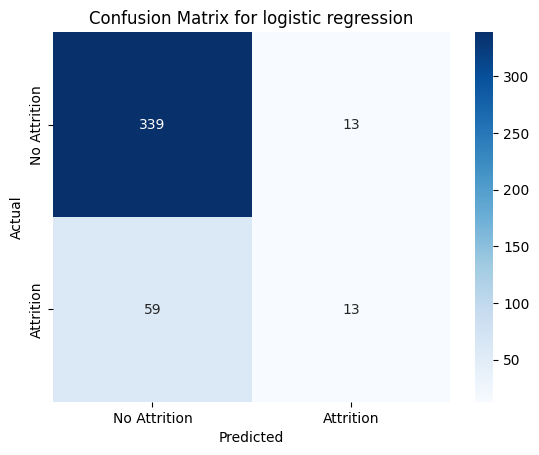

In [ ]:
# # accuracy score
lr_accuracy = accuracy_score(y_test, lr_predictions)
print(accuracy_score(y_test, lr_predictions))

# Confusion model of logistic regression model
lr_confusion_matrix = confusion_matrix(y_test,lr_predictions)
sns.heatmap(lr_confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Attrition', 'Attrition'], yticklabels=['No Attrition', 'Attrition'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for logistic regression')
plt.show()

In [ ]:
# Store coefficients
lr_int = lr_model.intercept_[0]
lr_coef = lr_model.coef_[0]

# print coefficients
print('intercept ', lr_int)
print(pd.DataFrame({'coeff': lr_coef}, index=X.columns))

intercept  -2.020277361022899
                               coeff
Career_Longevity           -0.371455
Business_Development_Units  0.162925
Work-Life_Choices           0.241972
OverTime                    0.324084
TravelSometimes             0.036738
Gender                      0.357199
Family&Travel               0.156100
Performance&Bonus           0.010227
Medical&LifeScience        -0.029872
Divorce_or_married         -0.185719


In [ ]:
# print exponentiated coefficients
print( math.exp(lr_coef[0]) )
print( math.exp(lr_coef[1]) )
print( math.exp(lr_coef[2]) )
print( math.exp(lr_coef[3]) )
print( math.exp(lr_coef[4]) )
print( math.exp(lr_coef[5]) )
print( math.exp(lr_coef[6]) )
print( math.exp(lr_coef[7]) )
print( math.exp(lr_coef[8]) )
print( math.exp(lr_coef[9]) )

0.6897303288764768
1.1769486221975103
1.2737582400244785
1.3827634929696477
1.0374207739535113
1.429319856304934
1.168942803852614
1.0102793183766778
0.970569529928433
0.8305067230623852


In [ ]:
#logistic regresssion summary stats
X_train_with_constant = sm.add_constant(X_train)
X_test_with_constant = sm.add_constant(X_test)

logit_reg = sm.Logit(y_train, X_train_with_constant).fit()
print(logit_reg.params)
print(logit_reg.summary())

Optimization terminated successfully.
         Current function value: 0.373517
         Iterations 7
const                        -2.020276
Career_Longevity             -0.371454
Business_Development_Units    0.162925
Work-Life_Choices             0.241972
OverTime                      0.324084
TravelSometimes               0.036740
Gender                        0.357200
Family&Travel                 0.156096
Performance&Bonus             0.010224
Medical&LifeScience          -0.029873
Divorce_or_married           -0.185720
dtype: float64
                           Logit Regression Results                           
Dep. Variable:              Attrition   No. Observations:                  634
Model:                          Logit   Df Residuals:                      623
Method:                           MLE   Df Model:                           10
Date:                Thu, 30 Nov 2023   Pseudo R-squ.:                  0.1771
Time:                        02:17:48   Log-Likelihood:    

## Naive Bayes

In [ ]:
# Training a Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_predictions = nb_model.predict(X_test)

0.8325471698113207


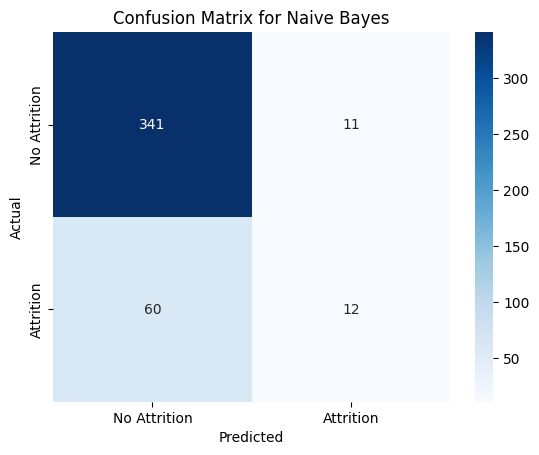

In [ ]:
# # accuracy score
nb_accuracy = accuracy_score(y_test, nb_predictions)
print(accuracy_score(y_test, nb_predictions))

# Confusion model of Navie Bayes model
NB_confusion_matrix = confusion_matrix(y_test,nb_predictions)
sns.heatmap(NB_confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Attrition', 'Attrition'], yticklabels=['No Attrition', 'Attrition'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for Naive Bayes')
plt.show()


## Neural Network

In [ ]:
# Training a neural network model
nn_model = MLPClassifier(hidden_layer_sizes=(2), activation='logistic', solver='lbfgs', random_state=42)
nn_model.fit(X_train, y_train)
nn_predictions = nn_model.predict(X_test)

nn_accuracy = accuracy_score(y_test, nn_predictions)

NN accuracy 0.8136792452830188


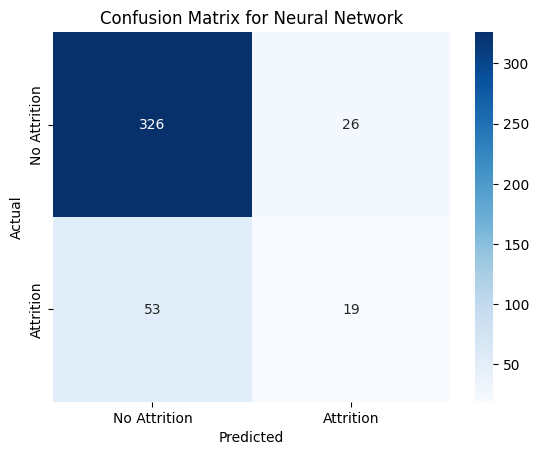

In [ ]:
# # accuracy score of the neural network model
print("NN accuracy",accuracy_score(y_test, nn_predictions))

# plot predicted vs actual values
pd.DataFrame({'actual': y_test, 'predicted': nn_predictions}).plot.scatter(x='actual', y='predicted', alpha=0.5)
plt.plot([5000, 30000], [5000, 30000], color='C1');

# Confusion model of neural network model
NN_confusion_matrix = confusion_matrix(y_test,nn_predictions)
sns.heatmap(NN_confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Attrition', 'Attrition'], yticklabels=['No Attrition', 'Attrition'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for Neural Network')
plt.show()

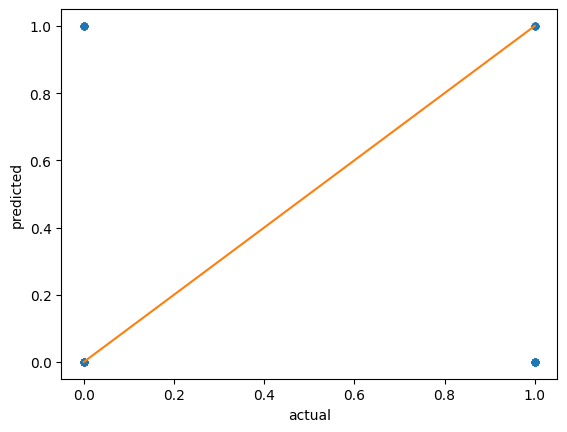

In [ ]:
# plot predicted vs actual values
pd.DataFrame({'actual': y_test, 'predicted': nn_predictions}).plot.scatter(x='actual', y='predicted', alpha=0.5)
plt.plot([0, 1], [0, 1], color='C1');

## Summary of All Models

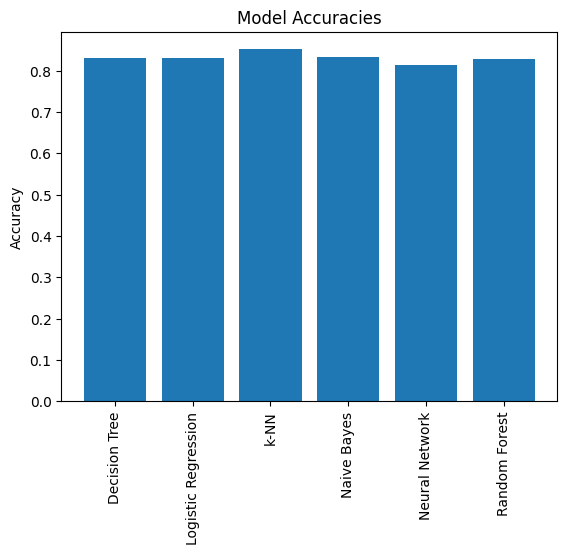

{'Decision Tree': 0.8301886792452831, 'Logistic Regression': 0.8301886792452831, 'k-NN': 0.8514150943396226, 'Naive Bayes': 0.8325471698113207, 'Neural Network': 0.8136792452830188, 'Random Forest': 0.8278301886792453}


In [ ]:
# Accuracies of all models
accuracies = {
    'Decision Tree': dt_accuracy,
    'Logistic Regression': lr_accuracy,
    'k-NN': knn_accuracy,
    'Naive Bayes': nb_accuracy,
    'Neural Network': nn_accuracy,
    'Random Forest': rf_accuracy
}

# Plotting the accuracies
plt.bar(range(len(accuracies)), list(accuracies.values()), align='center')
plt.xticks(range(len(accuracies)), list(accuracies.keys()), rotation='vertical')
plt.ylabel('Accuracy')
plt.title('Model Accuracies')
plt.show()

print(accuracies)

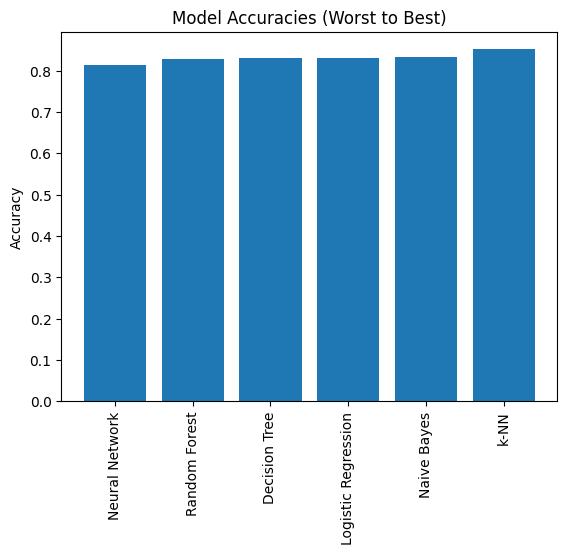

Ranked Accuracies (Worst to Best):
1. Neural Network: 0.8136792452830188
2. Random Forest: 0.8278301886792453
3. Decision Tree: 0.8301886792452831
4. Logistic Regression: 0.8301886792452831
5. Naive Bayes: 0.8325471698113207
6. k-NN: 0.8514150943396226
Original Accuracies:
{'Decision Tree': 0.8301886792452831, 'Logistic Regression': 0.8301886792452831, 'k-NN': 0.8514150943396226, 'Naive Bayes': 0.8325471698113207, 'Neural Network': 0.8136792452830188, 'Random Forest': 0.8278301886792453}


In [ ]:
#MODEL ACCURACY IN ACENDING ORDER

# Accuracies of all models
accuracies = {
    'Decision Tree': dt_accuracy,
    'Logistic Regression': lr_accuracy,
    'k-NN': knn_accuracy,
    'Naive Bayes': nb_accuracy,
    'Neural Network': nn_accuracy,
    'Random Forest': rf_accuracy
}

# Sort the models based on accuracy (worst to best)
sorted_accuracies = sorted(accuracies.items(), key=lambda x: x[1])

# Plotting the accuracies
plt.bar(range(len(sorted_accuracies)), [acc for _, acc in sorted_accuracies], align='center')
plt.xticks(range(len(sorted_accuracies)), [model for model, _ in sorted_accuracies], rotation='vertical')
plt.ylabel('Accuracy')
plt.title('Model Accuracies (Worst to Best)')
plt.show()

# Print the ranked accuracies
print("Ranked Accuracies (Worst to Best):")
for rank, (model, accuracy) in enumerate(sorted_accuracies, start=1):
    print(f"{rank}. {model}: {accuracy}")

print("Original Accuracies:")
print(accuracies)


In [ ]:
# NN_confusion_matrix is in the format: [[TN, FP], [FN, TP]]
print("--NN_Stats--")
TN, FP, FN, TP = NN_confusion_matrix.ravel()

# Calculate True Positive Rate (TPR)
TPR = TP / (TP + FN)

# Calculate True Negative Rate (TNR)
TNR = TN / (TN + FP)

# Calculate False Positive Rate (FPR)
FPR = FP / (FP + TN)

# Print the rates
print("True Positive Rate (TPR):", TPR)
print("True Negative Rate (TNR):", TNR)
print("False Positive Rate (FPR):", FPR)
#______________________________________________________________________
# NB_confusion_matrix is in the format: [[TN, FP], [FN, TP]]
TN1, FP1, FN1, TP1 = NB_confusion_matrix.ravel()

# Calculate True Positive Rate (TPR)
TPR1 = TP1 / (TP1 + FN1)

# Calculate True Negative Rate (TNR)
TNR1 = TN1 / (TN1 + FP1)

# Calculate False Positive Rate (FPR)
FPR1 = FP1 / (FP1 + TN1)

# Print the rates
print("--NB_Stats--")
print("True Positive Rate (TPR):", TPR1)
print("True Negative Rate (TNR):", TNR1)
print("False Positive Rate (FPR):", FPR1)
#______________________________________________________________________
# lr_confusion_matrix is in the format: [[TN, FP], [FN, TP]]
TN2, FP2, FN2, TP2 = lr_confusion_matrix.ravel()

# Calculate True Positive Rate (TPR)
TPR2 = TP2 / (TP2 + FN2)

# Calculate True Negative Rate (TNR)
TNR2 = TN2 / (TN2 + FP2)

# Calculate False Positive Rate (FPR)
FPR2 = FP2 / (FP2 + TN2)

# Print the rates
print("--LR_Stats--")
print("True Positive Rate (TPR):", TPR2)
print("True Negative Rate (TNR):", TNR2)
print("False Positive Rate (FPR):", FPR2)
#______________________________________________________________________
# knn_confusion_matrix is in the format: [[TN, FP], [FN, TP]]
TN3, FP3, FN3, TP3 = knn_conf_matrix.ravel()

# Calculate True Positive Rate (TPR)
TPR3 = TP3 / (TP3 + FN3)

# Calculate True Negative Rate (TNR)
TNR3 = TN3 / (TN3 + FP3)

# Calculate False Positive Rate (FPR)
FPR3 = FP3 / (FP3 + TN3)

# Print the rates
print("--knn_Stats--")
print("True Positive Rate (TPR):", TPR3)
print("True Negative Rate (TNR):", TNR3)
print("False Positive Rate (FPR):", FPR3)
#______________________________________________________________________
# rf_confusion_matrix is in the format: [[TN, FP], [FN, TP]]
TN4, FP4, FN4, TP4 = rf_conf_matrix.ravel()

# Calculate True Positive Rate (TPR)
TPR4 = TP4 / (TP4 + FN4)

# Calculate True Negative Rate (TNR)
TNR4 = TN4 / (TN4 + FP4)

# Calculate False Positive Rate (FPR)
FPR4 = FP4 / (FP4 + TN4)

# Print the rates
print("--rf_Stats--")
print("True Positive Rate (TPR):", TPR4)
print("True Negative Rate (TNR):", TNR4)
print("False Positive Rate (FPR):", FPR4)
#______________________________________________________________________
# pruned_dt_conf_matrix is in the format: [[TN, FP], [FN, TP]]
TN5, FP5, FN5, TP5 = pruned_dt_conf_matrix.ravel()

# Calculate True Positive Rate (TPR)
TPR5 = TP5 / (TP5 + FN5)

# Calculate True Negative Rate (TNR)
TNR5 = TN5 / (TN5 + FP5)

# Calculate False Positive Rate (FPR)
FPR5 = FP5 / (FP5 + TN5)

# Print the rates
print("--pruned_dt_Stats--")
print("True Positive Rate (TPR):", TPR5)
print("True Negative Rate (TNR):", TNR5)
print("False Positive Rate (FPR):", FPR5)

--NN_Stats--
True Positive Rate (TPR): 0.2638888888888889
True Negative Rate (TNR): 0.9261363636363636
False Positive Rate (FPR): 0.07386363636363637
--NB_Stats--
True Positive Rate (TPR): 0.16666666666666666
True Negative Rate (TNR): 0.96875
False Positive Rate (FPR): 0.03125
--LR_Stats--
True Positive Rate (TPR): 0.18055555555555555
True Negative Rate (TNR): 0.9630681818181818
False Positive Rate (FPR): 0.036931818181818184
--knn_Stats--
True Positive Rate (TPR): 0.1388888888888889
True Negative Rate (TNR): 0.9971590909090909
False Positive Rate (FPR): 0.002840909090909091
--rf_Stats--
True Positive Rate (TPR): 0.19444444444444445
True Negative Rate (TNR): 0.9573863636363636
False Positive Rate (FPR): 0.04261363636363636
--pruned_dt_Stats--
True Positive Rate (TPR): 0.06944444444444445
True Negative Rate (TNR): 0.9857954545454546
False Positive Rate (FPR): 0.014204545454545454


## Out-of-Sample Testing

In [ ]:
#test with a new employee data
# define a new employee
newEmployee = pd.DataFrame([
{
 'Age':24,
 'Attrition':1,
 'BusinessTravel':'Travel_Rarely',
 'DailyRate':1104,
 'Department':'Human Resources',
 'DistanceFromHome':1,
 'Education':3,
 'EducationField':'Human Resources',
 'EmployeeCount':1,
 'EmployeeNumber':222,
 'EnvironmentSatisfaction':3,
 'Gender':'Male',
 'HourlyRate':94,
 'JobInvolvement':3,
 'JobLevel':2,
 'JobRole':'Human Resources',
 'JobSatisfaction':3,
 'MaritalStatus':'Single',
 'MonthlyIncome':6969,
 'MonthlyRate':19696,
 'NumCompaniesWorked':1,
 'Over18':'Y',
 'OverTime':'Yes',
 'PercentSalaryHike':11,
 'PerformanceRating':3,
 'RelationshipSatisfaction':1,
 'StandardHours':80,
 'StockOptionLevel':0,
 'TotalWorkingYears':5,
 'TrainingTimesLastYear':0,
 'WorkLifeBalance':1,
 'YearsAtCompany':3,
 'YearsInCurrentRole':3,
 'YearsSinceLastPromotion':0,
 'YearsWithCurrManager':3
 }
 ])
newEmployee

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,24,1,Travel_Rarely,1104,Human Resources,1,3,Human Resources,1,222,...,1,80,0,5,0,1,3,3,0,3


In [ ]:
#pre-process test sample
dummies_1BT = pd.get_dummies(newEmployee['BusinessTravel'],drop_first=False)
dummies_1DP = pd.get_dummies(newEmployee['Department'],drop_first=False)
dummies_1EF = pd.get_dummies(newEmployee['EducationField'],drop_first=False)
dummies_1EF = dummies_EF.rename(columns={'Other': 'EF_Other'})
dummies_1JR = pd.get_dummies(newEmployee['JobRole'],drop_first=False)
dummies_1OT = pd.get_dummies(newEmployee['OverTime'],drop_first=False)
dummies_1OT = dummies_OT.rename(columns={'Yes': 'OT_Yes', 'No': 'OT_No'})
dummies_1MS = pd.get_dummies(newEmployee['MaritalStatus'],drop_first=False)

newEmployee[dummies_1BT.columns] = dummies_1BT
newEmployee[dummies_1DP.columns] = dummies_1DP
newEmployee[dummies_1EF.columns] = dummies_1EF
newEmployee[dummies_1JR.columns] = dummies_1JR
newEmployee[dummies_1OT.columns] = dummies_1OT
newEmployee[dummies_1MS.columns] = dummies_1MS

# We are going to drop these coloumns because we are going to create dummy variables for them
Columns_Drop = ['BusinessTravel','Department','Gender','EducationField','JobRole','OverTime','Over18','OverTime','MaritalStatus','StandardHours','EmployeeCount','EmployeeNumber']
newEmployee = newEmployee.drop(columns=Columns_Drop)
newEmployee.head()


,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,Travel_Rarely,Human Resources,Life Sciences,Marketing,Medical,EF_Other,Technical Degree,OT_No,OT_Yes,Single
0,24,1,1104,1,3,3,94,3,2,3,...,1,1,1,0,0,0,0,0,1,1


In [ ]:
newEmployee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1 non-null      int64
 1   Attrition                 1 non-null      int64
 2   DailyRate                 1 non-null      int64
 3   DistanceFromHome          1 non-null      int64
 4   Education                 1 non-null      int64
 5   EnvironmentSatisfaction   1 non-null      int64
 6   HourlyRate                1 non-null      int64
 7   JobInvolvement            1 non-null      int64
 8   JobLevel                  1 non-null      int64
 9   JobSatisfaction           1 non-null      int64
 10  MonthlyIncome             1 non-null      int64
 11  MonthlyRate               1 non-null      int64
 12  NumCompaniesWorked        1 non-null      int64
 13  PercentSalaryHike         1 non-null      int64
 14  PerformanceRating         1 non-null      int6

In [ ]:
Attrition_new = newEmployee["Attrition"]
newEmployee_withoutAttrition = newEmployee.drop(["Attrition"], axis=1)
newEmployee_withoutAttrition.head(5)

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,Travel_Rarely,Human Resources,Life Sciences,Marketing,Medical,EF_Other,Technical Degree,OT_No,OT_Yes,Single
0,24,1104,1,3,3,94,3,2,3,6969,...,1,1,1,0,0,0,0,0,1,1


In [ ]:
# Scaling Standardization (0 mean, unit variance) is done via the sklearn.preprocessing scale() function

pcs1 = PCA()
pcs1.fit(preprocessing.scale(newEmployee_withoutAttrition))

# view the importance of principal components
pcs1Summary_df1 = pd.DataFrame({
            'Proportion of variance': pcs1.explained_variance_ratio_,
            'Cumulative proportion': np.cumsum(pcs1.explained_variance_ratio_)
            })
pcs1Summary_df1.round(3)

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_pca.py:543: RuntimeWarning: invalid value encountered in divide
  explained_variance_ = (S**2) / (n_samples - 1)


,Proportion of variance,Cumulative proportion
0,NaN,NaN


In [ ]:
knn.predict(newEmployee)
lr.predict(newEmployee)
nb.predict(newEmployee)
nn.predict(newEmployee)
rf.predict(newEmployee)

ValueError: ignored